In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
dataset = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [3]:
dataset['BMI'] = dataset['Weight']/(dataset['Height']**2)
dataset = dataset[['Gender', 'Age', 'Height',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad']]
#Check if the new column was calculated and placed correctly
dataset.head()

,Gender,Age,Height,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,no,2.0,3.0,Sometimes,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,no,3.0,3.0,Sometimes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,no,2.0,3.0,Sometimes,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,no,3.0,3.0,Sometimes,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,no,2.0,1.0,Sometimes,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
dataset1 = dataset.dropna()

In [5]:
dataset1

,Gender,Age,Height,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,no,2.0,3.0,Sometimes,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,no,3.0,3.0,Sometimes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,no,2.0,3.0,Sometimes,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,no,3.0,3.0,Sometimes,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,no,2.0,1.0,Sometimes,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,yes,3.0,3.0,Sometimes,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,yes,3.0,3.0,Sometimes,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,yes,3.0,3.0,Sometimes,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,yes,3.0,3.0,Sometimes,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
X = dataset.iloc[:,:13]
Y = dataset.iloc[:,[13]]

In [7]:
X

,Gender,Age,Height,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,no,2.0,3.0,Sometimes,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,no,3.0,3.0,Sometimes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,no,2.0,3.0,Sometimes,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,no,3.0,3.0,Sometimes,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,no,2.0,1.0,Sometimes,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,yes,3.0,3.0,Sometimes,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,yes,3.0,3.0,Sometimes,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,yes,3.0,3.0,Sometimes,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,yes,3.0,3.0,Sometimes,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [8]:
Y

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


In [9]:
lEncoder = LabelEncoder()
columns_to_encode = [0,3,6,8,11,12,13]
encoded = dataset.iloc[:, columns_to_encode].apply(lambda col: lEncoder.fit_transform(col))

# Assign the transformed values back to the original DataFrame
dataset.iloc[:, columns_to_encode] = encoded

C:\Users\Anbo\AppData\Local\Temp\ipykernel_11684\2838149778.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.iloc[:, columns_to_encode] = encoded


In [10]:
dataset

,Gender,Age,Height,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,0,2.0,3.0,2,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.520000,0,3.0,3.0,2,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1.800000,0,2.0,3.0,2,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,0,3.0,3.0,2,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,0,2.0,1.0,2,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,1,3.0,3.0,2,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,1,3.0,3.0,2,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,1,3.0,3.0,2,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,1,3.0,3.0,2,2.852339,0,1.139107,0.586035,2,3,4


In [11]:
#Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(dataset)
cols = [['Gender', 'Age', 'Height',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad']]
normalizedData = pd.DataFrame(normalizedData, columns=cols)
print(normalizedData.head())

  Gender       Age    Height FAVC FCVC       NCP      CAEC CH2O  SCC  \
0    0.0  0.148936  0.320755  0.0  0.5  0.666667  0.666667  0.5  0.0   
1    0.0  0.148936  0.132075  0.0  1.0  0.666667  0.666667  1.0  1.0   
2    1.0  0.191489  0.660377  0.0  0.5  0.666667  0.666667  0.5  0.0   
3    1.0  0.276596  0.660377  0.0  1.0  0.666667  0.666667  0.5  0.0   
4    1.0  0.170213  0.622642  0.0  0.5  0.000000  0.666667  0.5  0.0   

        FAF  TUE      CALC MTRANS NObeyesdad  
0  0.000000  0.5  1.000000   0.75   0.166667  
1  1.000000  0.0  0.666667   0.75   0.166667  
2  0.666667  0.5  0.333333   0.75   0.166667  
3  0.666667  0.0  0.333333   1.00   0.833333  
4  0.000000  0.0  0.666667   0.75   1.000000  


<Axes: >

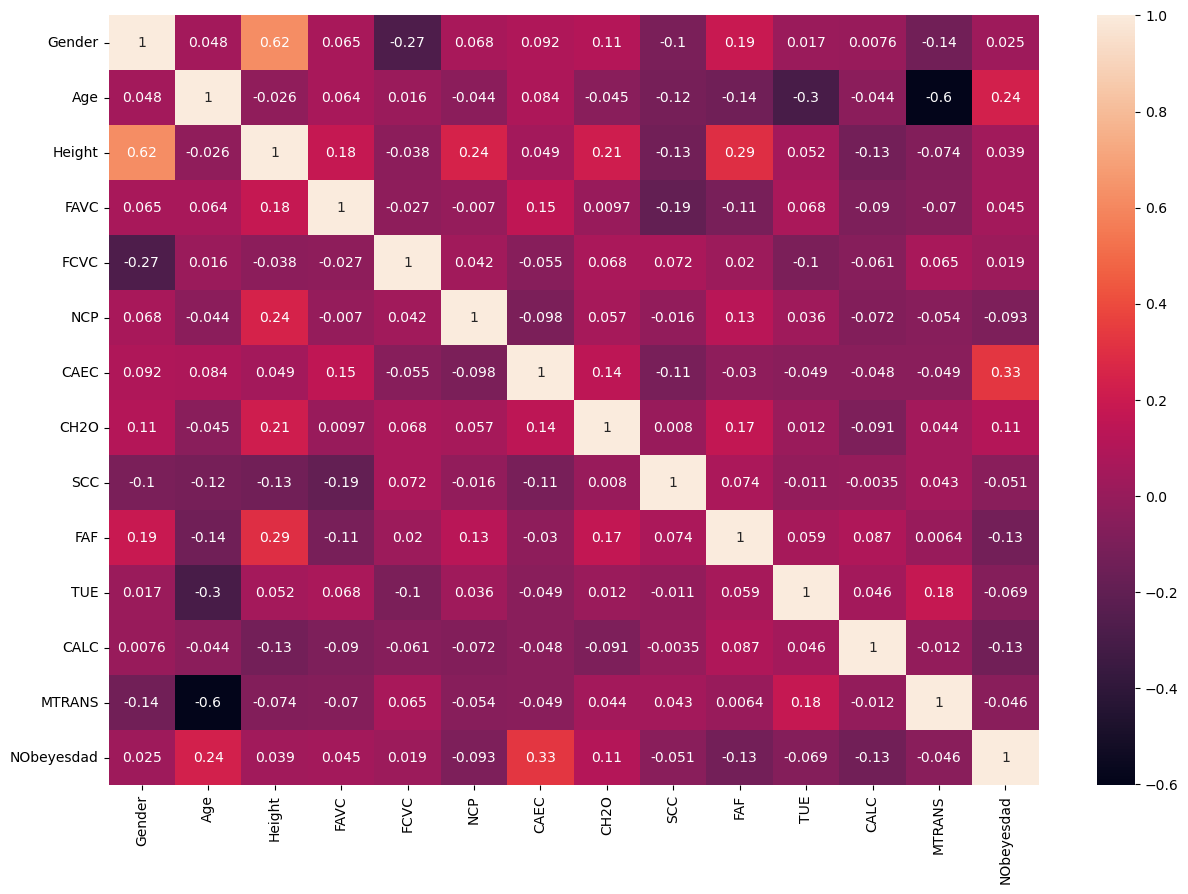

In [12]:
dataset.corr()
#Correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(), annot = True)

In [13]:
#Store the feature and target variable
X = normalizedData.iloc[:, :-1]
y = Y

print(normalizedData.shape)
print(X.shape)
print(y.shape)

#Partition the data into training and test sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)


(2111, 14)
(2111, 13)
(2111, 1)


In [14]:
print(X_train.columns)
print(y_train.columns)
X_train.columns = ['_'.join(map(str, col)).replace(' ', '_') for col in X_train.columns]

# Check the updated column names
print(X_train.columns)

MultiIndex([('Gender',),
            (   'Age',),
            ('Height',),
            (  'FAVC',),
            (  'FCVC',),
            (   'NCP',),
            (  'CAEC',),
            (  'CH2O',),
            (   'SCC',),
            (   'FAF',),
            (   'TUE',),
            (  'CALC',),
            ('MTRANS',)],
           )
Index(['NObeyesdad'], dtype='object')
Index(['Gender', 'Age', 'Height', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'SCC',
       'FAF', 'TUE', 'CALC', 'MTRANS'],
      dtype='object')


In [15]:
# Compute the baseline classification accuracy for X_train
!pip install lightgbm
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)


C:\Users\Anbo\.conda\envs\myEnv\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anbo\.conda\envs\myEnv\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier()

In [16]:
y_pred=clf.predict(X_test)
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.8470


In [17]:
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[75  8  0  0  0  2  1]
 [ 3 70  8  0  0  4  8]
 [ 3 10 83  3  0  1  2]
 [ 0  4  0 84  0  0  0]
 [ 0  1  0  0 97  0  0]
 [ 1 12  5  1  0 67  2]
 [ 2  5  2  5  0  4 61]]

True Positives(TP) =  75

True Negatives(TN) =  70

False Positives(FP) =  8

False Negatives(FN) =  3


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.87      0.88        86
      Normal_Weight       0.64      0.75      0.69        93
     Obesity_Type_I       0.85      0.81      0.83       102
    Obesity_Type_II       0.90      0.95      0.93        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.86      0.76      0.81        88
Overweight_Level_II       0.82      0.77      0.80        79

           accuracy                           0.85       634
          macro avg       0.85      0.85      0.85       634
       weighted avg       0.85      0.85      0.85       634



<Axes: >

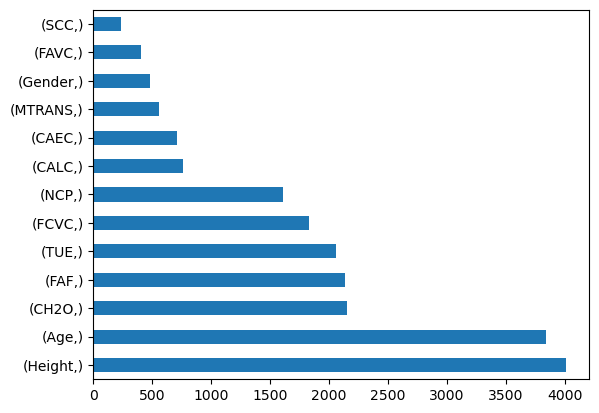

In [20]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', )